In [5]:
#@title Twitter Auth Token

twitter_auth_token = 'edb7803027df10c20907e8b1f7b1418904e60177' # change this auth token

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

In [10]:
filename = 'tes1.csv'
search_keyword = 'Jakarta tenggelam OR Jakarta banjir OR Jakarta ambles OR penurunan tanah Jakarta OR rob Jakarta since:2024-01-01 until:2024-12-30 lang:id -bitcoin -forex -iklan -promo'
limit = 500

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Filling in keywords: Jakarta tenggelam OR Jakarta banjir OR Jakarta ambles OR penurunan tanah Jakarta OR rob Jakarta since:2024-01-01 until:2024-12-30 lang:id -bitcoin -forex -iklan -promo



Your tweets saved to: d:\KULIAH-34\SELF_LEARN\projectIBM\tweets-data\tes1.csv
Total tweets saved: 17

-- Scrolling... (1) (2)

Your tweets saved to: d:\KULIAH-34\SELF_LEARN\projectIBM\tweets-data\tes1.csv
Total tweets saved: 36

-- Scrolling... (1)

Your tweets saved to: d:\KULIAH-34\SELF_LEARN\projectIBM\tweets-data\tes1.csv
Total tweets saved: 56

-- Scrolling... (1)

Your tweets saved to: d:\KULIAH-34\SELF_LEARN\pr

[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result


CLEANING DATA

In [38]:
import pandas as pd
import numpy as np
import string
import re

In [39]:
jakarta = pd.read_csv('jakarta_tweets.csv')
print(jakarta)

     conversation_id_str                      created_at  favorite_count  \
0    1871770107762135365  Wed Dec 25 15:39:58 +0000 2024               3   
1    1871086655106679042  Mon Dec 23 06:53:16 +0000 2024               1   
2    1870992579627794440  Mon Dec 23 00:39:31 +0000 2024               1   
3    1870668640640700568  Sun Dec 22 03:12:13 +0000 2024               2   
4    1869707588985864222  Sat Dec 21 23:44:02 +0000 2024               1   
..                   ...                             ...             ...   
310  1743300463918010515  Sat Jan 06 14:24:52 +0000 2024               0   
311  1742740667456246093  Thu Jan 04 16:50:33 +0000 2024               0   
312  1742486559948247421  Thu Jan 04 10:42:11 +0000 2024               0   
313  1742495331429040466  Thu Jan 04 06:49:09 +0000 2024               0   
314  1742369433455407213  Wed Jan 03 05:13:02 +0000 2024               0   

                                             full_text               id_str  \
0    @Al

In [58]:
tweet = jakarta['clean']
print(f"Berhasil mengambil {len(tweet)} tweet")

Berhasil mengambil 315 tweet


CASE FOLDING & CLEANING TEXT

In [ ]:
def clean_text(text):
    text = re.sub(r'@[^\s]+', '', text)
    
    text = re.sub(r"(http[s]?://\S+|www\.\S+)", "", text)
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'<.*?>', '', text)
    
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    text = re.sub(r"\n", " ", text)
    
    text = text.lower()
    
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    
    text = ' '.join(text.split())

    return text

In [60]:
jakarta['clean'] = [clean_text(i) for i in tweet]
tweet = jakarta['clean']

In [61]:
jakarta.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean
0,1871770107762135365,Wed Dec 25 15:39:58 +0000 2024,3,@AltercrossX @proletarsusah @koganenohikari tr...,1871943980382036302,NaN,AltercrossX,in,NaN,0,0,0,https://x.com/undefined/status/187194398038203...,2998208358,NaN,true apalagi jakarta sudah mengalami penurunan...
1,1871086655106679042,Mon Dec 23 06:53:16 +0000 2024,1,Dalam memastikan aksi konvergensi stunting ber...,1871086655106679042,https://pbs.twimg.com/media/GfdvYALbMAAPQgB.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187108665510667...,3079723462,NaN,dalam memastikan aksi konvergensi stunting ber...
2,1870992579627794440,Mon Dec 23 00:39:31 +0000 2024,1,4/8 ️ Penurunan Tanah Kegiatan pengambilan air...,1870992596610462102,NaN,FakrulR38994657,in,NaN,0,1,0,https://x.com/undefined/status/187099259661046...,1232818004208934912,NaN,penurunan tanah kegiatan pengambilan air tanah...
3,1870668640640700568,Sun Dec 22 03:12:13 +0000 2024,2,Permukaan tanah di Jakarta terus turun sejak 1...,1870668640640700568,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187066864064070...,1126684769536733184,NaN,permukaan tanah di jakarta terus turun sejak d...
4,1869707588985864222,Sat Dec 21 23:44:02 +0000 2024,1,@proletarsusah @UseKidd @RomeoWalker19 Infiltr...,1870616247865651436,NaN,proletarsusah,in,NaN,0,0,0,https://x.com/undefined/status/187061624786565...,1500448874175295494,NaN,infiltrasi kurang ditambah penggunaan air tana...
5,1870537852653916414,Sat Dec 21 18:32:31 +0000 2024,2,sekolah gak sih nying? hufht tahan... jadi gin...,1870537852653916414,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187053785265391...,1266921255761965060,NaN,sekolah gak sih nying hufht tahan jadi gini se...
6,1870025289667096682,Sat Dec 21 08:07:05 +0000 2024,0,@musuhphp Minim resapan Air Buang sampah semba...,1870380456488890494,NaN,musuhphp,in,NaN,0,0,0,https://x.com/undefined/status/187038045648889...,1335903268841484288,NaN,minim resapan air buang sampah sembarangan dit...
7,1870373055782170829,Sat Dec 21 07:37:41 +0000 2024,0,padahal bener. bahkan di jakarta udah dimulai ...,1870373055782170829,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/187037305578217...,1432322808718102530,NaN,padahal bener bahkan di jakarta udah dimulai p...
8,1870364028553371904,Sat Dec 21 07:01:48 +0000 2024,6,#Foto Sepekan terakhir banjir rob terendam Jak...,1870364028553371904,https://pbs.twimg.com/media/GfTeKq-WsAAghAN.jpg,NaN,in,NaN,0,1,1,https://x.com/undefined/status/187036402855337...,69183155,NaN,foto sepekan terakhir banjir rob terendam jaka...
9,1870285486398603300,Sat Dec 21 01:49:42 +0000 2024,42,Ya emang penurunan tanah di jakarta kan gara-g...,1870285486398603300,NaN,NaN,in,NaN,0,0,4,https://x.com/undefined/status/187028548639860...,1140233707409698818,NaN,ya emang penurunan tanah di jakarta kan garaga...


In [63]:
print(tweet)

0      true apalagi jakarta sudah mengalami penurunan...
1      dalam memastikan aksi konvergensi stunting ber...
2      penurunan tanah kegiatan pengambilan air tanah...
3      permukaan tanah di jakarta terus turun sejak d...
4      infiltrasi kurang ditambah penggunaan air tana...
                             ...                        
310    wkwkwkwkjakarta bisa tenggelam krn penurunan p...
311    seinget saya ada informasi bahwa penurunan muk...
312    ikn selain utk merubah paradigma jawa mjd indo...
313    ya memang sumur resapan hanya salah satu cara ...
314    setiap zhanrghao dikatain boti tanah jakarta a...
Name: clean, Length: 315, dtype: object


TOKENIZING

In [ ]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer(r'\w+\S*[0-9]*\S*')

jakarta['Token'] = jakarta['clean'].apply(regexp.tokenize)

In [65]:
jakarta

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean,Token
0,1871770107762135365,Wed Dec 25 15:39:58 +0000 2024,3,@AltercrossX @proletarsusah @koganenohikari tr...,1871943980382036302,NaN,AltercrossX,in,NaN,0,0,0,https://x.com/undefined/status/187194398038203...,2998208358,NaN,true apalagi jakarta sudah mengalami penurunan...,"[true, apalagi, jakarta, sudah, mengalami, pen..."
1,1871086655106679042,Mon Dec 23 06:53:16 +0000 2024,1,Dalam memastikan aksi konvergensi stunting ber...,1871086655106679042,https://pbs.twimg.com/media/GfdvYALbMAAPQgB.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187108665510667...,3079723462,NaN,dalam memastikan aksi konvergensi stunting ber...,"[dalam, memastikan, aksi, konvergensi, stuntin..."
2,1870992579627794440,Mon Dec 23 00:39:31 +0000 2024,1,4/8 ️ Penurunan Tanah Kegiatan pengambilan air...,1870992596610462102,NaN,FakrulR38994657,in,NaN,0,1,0,https://x.com/undefined/status/187099259661046...,1232818004208934912,NaN,penurunan tanah kegiatan pengambilan air tanah...,"[penurunan, tanah, kegiatan, pengambilan, air,..."
3,1870668640640700568,Sun Dec 22 03:12:13 +0000 2024,2,Permukaan tanah di Jakarta terus turun sejak 1...,1870668640640700568,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187066864064070...,1126684769536733184,NaN,permukaan tanah di jakarta terus turun sejak d...,"[permukaan, tanah, di, jakarta, terus, turun, ..."
4,1869707588985864222,Sat Dec 21 23:44:02 +0000 2024,1,@proletarsusah @UseKidd @RomeoWalker19 Infiltr...,1870616247865651436,NaN,proletarsusah,in,NaN,0,0,0,https://x.com/undefined/status/187061624786565...,1500448874175295494,NaN,infiltrasi kurang ditambah penggunaan air tana...,"[infiltrasi, kurang, ditambah, penggunaan, air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1743300463918010515,Sat Jan 06 14:24:52 +0000 2024,0,@Kupang458869 @dymszy @el_kaezzar @HerryDharma...,1743639777981661566,NaN,Kupang458869,in,NaN,0,0,0,https://x.com/undefined/status/174363977798166...,55182219,NaN,wkwkwkwkjakarta bisa tenggelam krn penurunan p...,"[wkwkwkwkjakarta, bisa, tenggelam, krn, penuru..."
311,1742740667456246093,Thu Jan 04 16:50:33 +0000 2024,0,@are_inismyname @Ndons_Back @bengkeldodo @zarr...,1742951661314924732,NaN,are_inismyname,in,NaN,0,0,0,https://x.com/undefined/status/174295166131492...,1622926379703750657,NaN,seinget saya ada informasi bahwa penurunan muk...,"[seinget, saya, ada, informasi, bahwa, penurun..."
312,1742486559948247421,Thu Jan 04 10:42:11 +0000 2024,0,@ajibams @Di4rmenK @tvOneNews @tomlembong @Ros...,1742858958635941895,NaN,ajibams,in,NaN,0,2,0,https://x.com/undefined/status/174285895863594...,1603521097827094529,NaN,ikn selain utk merubah paradigma jawa mjd indo...,"[ikn, selain, utk, merubah, paradigma, jawa, m..."
313,1742495331429040466,Thu Jan 04 06:49:09 +0000 2024,0,@Kimberley_2024 @76_nmlsga Ya memang sumur res...,1742800315920064956,NaN,Kimberley_2024,in,NaN,0,2,0,https://x.com/undefined/status/174280031592006...,1316672563091652609,NaN,ya memang sumur resapan hanya salah satu cara ...,"[ya, memang, sumur, resapan, hanya, salah, sat..."


NORMALISASI


In [ ]:
normalized_word = pd.read_csv("Normalisasi.csv", encoding='latin1')

normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

jakarta['Normalisasi'] = jakarta['Token'].apply(normalized_term)

jakarta

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean,Token,Normalisasi
0,1871770107762135365,Wed Dec 25 15:39:58 +0000 2024,3,@AltercrossX @proletarsusah @koganenohikari tr...,1871943980382036302,NaN,AltercrossX,in,NaN,0,0,0,https://x.com/undefined/status/187194398038203...,2998208358,NaN,true apalagi jakarta sudah mengalami penurunan...,"[true, apalagi, jakarta, sudah, mengalami, pen...","[true, apalagi, jakarta, sudah, mengalami, pen..."
1,1871086655106679042,Mon Dec 23 06:53:16 +0000 2024,1,Dalam memastikan aksi konvergensi stunting ber...,1871086655106679042,https://pbs.twimg.com/media/GfdvYALbMAAPQgB.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187108665510667...,3079723462,NaN,dalam memastikan aksi konvergensi stunting ber...,"[dalam, memastikan, aksi, konvergensi, stuntin...","[dalam, memastikan, aksi, konvergensi, stuntin..."
2,1870992579627794440,Mon Dec 23 00:39:31 +0000 2024,1,4/8 ️ Penurunan Tanah Kegiatan pengambilan air...,1870992596610462102,NaN,FakrulR38994657,in,NaN,0,1,0,https://x.com/undefined/status/187099259661046...,1232818004208934912,NaN,penurunan tanah kegiatan pengambilan air tanah...,"[penurunan, tanah, kegiatan, pengambilan, air,...","[penurunan, tanah, kegiatan, pengambilan, air,..."
3,1870668640640700568,Sun Dec 22 03:12:13 +0000 2024,2,Permukaan tanah di Jakarta terus turun sejak 1...,1870668640640700568,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187066864064070...,1126684769536733184,NaN,permukaan tanah di jakarta terus turun sejak d...,"[permukaan, tanah, di, jakarta, terus, turun, ...","[permukaan, tanah, di, jakarta, terus, turun, ..."
4,1869707588985864222,Sat Dec 21 23:44:02 +0000 2024,1,@proletarsusah @UseKidd @RomeoWalker19 Infiltr...,1870616247865651436,NaN,proletarsusah,in,NaN,0,0,0,https://x.com/undefined/status/187061624786565...,1500448874175295494,NaN,infiltrasi kurang ditambah penggunaan air tana...,"[infiltrasi, kurang, ditambah, penggunaan, air...","[infiltrasi, kurang, ditambah, penggunaan, air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1743300463918010515,Sat Jan 06 14:24:52 +0000 2024,0,@Kupang458869 @dymszy @el_kaezzar @HerryDharma...,1743639777981661566,NaN,Kupang458869,in,NaN,0,0,0,https://x.com/undefined/status/174363977798166...,55182219,NaN,wkwkwkwkjakarta bisa tenggelam krn penurunan p...,"[wkwkwkwkjakarta, bisa, tenggelam, krn, penuru...","[wkwkwkwkjakarta, bisa, tenggelam, karena, pen..."
311,1742740667456246093,Thu Jan 04 16:50:33 +0000 2024,0,@are_inismyname @Ndons_Back @bengkeldodo @zarr...,1742951661314924732,NaN,are_inismyname,in,NaN,0,0,0,https://x.com/undefined/status/174295166131492...,1622926379703750657,NaN,seinget saya ada informasi bahwa penurunan muk...,"[seinget, saya, ada, informasi, bahwa, penurun...","[seinget, aku, ada, informasi, bahwa, penuruna..."
312,1742486559948247421,Thu Jan 04 10:42:11 +0000 2024,0,@ajibams @Di4rmenK @tvOneNews @tomlembong @Ros...,1742858958635941895,NaN,ajibams,in,NaN,0,2,0,https://x.com/undefined/status/174285895863594...,1603521097827094529,NaN,ikn selain utk merubah paradigma jawa mjd indo...,"[ikn, selain, utk, merubah, paradigma, jawa, m...","[ikn, selain, untuk, merubah, paradigma, jawa,..."
313,1742495331429040466,Thu Jan 04 06:49:09 +0000 2024,0,@Kimberley_2024 @76_nmlsga Ya memang sumur res...,1742800315920064956,NaN,Kimberley_2024,in,NaN,0,2,0,https://x.com/undefined/status/174280031592006...,1316672563091652609,NaN,ya memang sumur resapan hanya salah satu cara ...,"[ya, memang, sumur, resapan, hanya, salah, sat...","[ya, memang, sumur, resapan, hanya, salah, sat..."


In [ ]:
from nltk.corpus import stopwords

stopword_list = stopwords.words('indonesian')

txt_stopword = pd.read_csv("stopword.csv", names=["stopwords"], header=None)
custom_stopwords = txt_stopword["stopwords"].tolist()

additional_stopwords = [
    "yahal", "nya", "pke", "dehh", "wkwk", "dpt", "jg", "yg", "yahahahahaha", "hahahaha", "haha",
    "hehe", "lah", "km", "ia", "msih", "ja", "ddpn", "dsruh", "dlu", "trhbung", "bangkitbersamaet",
    "ng", "sih", "sik", "sak", "the", "wef", "klaus", "nih", "gaes", "guys", "gas", "ct", "dek", 
    "ive", "kak", "ka", "ai", "ya", "loh", "kok", "gek", "wes", "ada", "so", "bu", "langsung", "knp", "hehe"
]

all_stopwords = set(stopword_list + custom_stopwords + additional_stopwords)

def remove_stopwords(text):
    return [word for word in text if word not in all_stopwords]

jakarta['Stopwords'] = jakarta['Normalisasi'].apply(remove_stopwords)

jakarta

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean,Token,Normalisasi,Stopwords
0,1871770107762135365,Wed Dec 25 15:39:58 +0000 2024,3,@AltercrossX @proletarsusah @koganenohikari tr...,1871943980382036302,NaN,AltercrossX,in,NaN,0,0,0,https://x.com/undefined/status/187194398038203...,2998208358,NaN,true apalagi jakarta sudah mengalami penurunan...,"[true, apalagi, jakarta, sudah, mengalami, pen...","[true, apalagi, jakarta, sudah, mengalami, pen...","[true, jakarta, mengalami, penurunan, signifik..."
1,1871086655106679042,Mon Dec 23 06:53:16 +0000 2024,1,Dalam memastikan aksi konvergensi stunting ber...,1871086655106679042,https://pbs.twimg.com/media/GfdvYALbMAAPQgB.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187108665510667...,3079723462,NaN,dalam memastikan aksi konvergensi stunting ber...,"[dalam, memastikan, aksi, konvergensi, stuntin...","[dalam, memastikan, aksi, konvergensi, stuntin...","[aksi, konvergensi, stunting, berjalan, pemeri..."
2,1870992579627794440,Mon Dec 23 00:39:31 +0000 2024,1,4/8 ️ Penurunan Tanah Kegiatan pengambilan air...,1870992596610462102,NaN,FakrulR38994657,in,NaN,0,1,0,https://x.com/undefined/status/187099259661046...,1232818004208934912,NaN,penurunan tanah kegiatan pengambilan air tanah...,"[penurunan, tanah, kegiatan, pengambilan, air,...","[penurunan, tanah, kegiatan, pengambilan, air,...","[penurunan, tanah, kegiatan, pengambilan, air,..."
3,1870668640640700568,Sun Dec 22 03:12:13 +0000 2024,2,Permukaan tanah di Jakarta terus turun sejak 1...,1870668640640700568,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187066864064070...,1126684769536733184,NaN,permukaan tanah di jakarta terus turun sejak d...,"[permukaan, tanah, di, jakarta, terus, turun, ...","[permukaan, tanah, di, jakarta, terus, turun, ...","[permukaan, tanah, jakarta, turun, angka, penu..."
4,1869707588985864222,Sat Dec 21 23:44:02 +0000 2024,1,@proletarsusah @UseKidd @RomeoWalker19 Infiltr...,1870616247865651436,NaN,proletarsusah,in,NaN,0,0,0,https://x.com/undefined/status/187061624786565...,1500448874175295494,NaN,infiltrasi kurang ditambah penggunaan air tana...,"[infiltrasi, kurang, ditambah, penggunaan, air...","[infiltrasi, kurang, ditambah, penggunaan, air...","[infiltrasi, ditambah, penggunaan, air, tanah,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1743300463918010515,Sat Jan 06 14:24:52 +0000 2024,0,@Kupang458869 @dymszy @el_kaezzar @HerryDharma...,1743639777981661566,NaN,Kupang458869,in,NaN,0,0,0,https://x.com/undefined/status/174363977798166...,55182219,NaN,wkwkwkwkjakarta bisa tenggelam krn penurunan p...,"[wkwkwkwkjakarta, bisa, tenggelam, krn, penuru...","[wkwkwkwkjakarta, bisa, tenggelam, karena, pen...","[wkwkwkwkjakarta, tenggelam, penurunan, permuk..."
311,1742740667456246093,Thu Jan 04 16:50:33 +0000 2024,0,@are_inismyname @Ndons_Back @bengkeldodo @zarr...,1742951661314924732,NaN,are_inismyname,in,NaN,0,0,0,https://x.com/undefined/status/174295166131492...,1622926379703750657,NaN,seinget saya ada informasi bahwa penurunan muk...,"[seinget, saya, ada, informasi, bahwa, penurun...","[seinget, aku, ada, informasi, bahwa, penuruna...","[seinget, informasi, penurunan, muka, tanah, j..."
312,1742486559948247421,Thu Jan 04 10:42:11 +0000 2024,0,@ajibams @Di4rmenK @tvOneNews @tomlembong @Ros...,1742858958635941895,NaN,ajibams,in,NaN,0,2,0,https://x.com/undefined/status/174285895863594...,1603521097827094529,NaN,ikn selain utk merubah paradigma jawa mjd indo...,"[ikn, selain, utk, merubah, paradigma, jawa, m...","[ikn, selain, untuk, merubah, paradigma, jawa,...","[ikn, merubah, paradigma, jawa, mjd, indonesia..."
313,1742495331429040466,Thu Jan 04 06:49:09 +0000 2024,0,@Kimberley_2024 @76_nmlsga Ya memang sumur res...,1742800315920064956,NaN,Kimberley_2024,in,NaN,0,2,0,https://x.com/undefined/status/174280031592006...,1316672563091

STEMMING

In [ ]:
!pip install swifter pandas tqdm dask psutil

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

tweet = jakarta['Stopwords']

term_dict = {}

for doc in tweet:
    for term in doc:
        if term not in term_dict:
            term_dict[term] = ''  

print("Jumlah kata unik sebelum stemming:", len(term_dict))
print("------")

terms_df = pd.DataFrame(list(term_dict.keys()), columns=['terms'])

terms_df['stemmed'] = terms_df['terms'].apply(stemmed_wrapper)

for idx, row in terms_df.iterrows():
    term_dict[row['terms']] = row['stemmed']
    print(row['terms'], ":", row['stemmed'])

print("Jumlah kata unik setelah stemming:", len(set(term_dict.values())))
print("------")


Jumlah kata unik sebelum stemming: 1671
------
true : true
jakarta : jakarta
mengalami : alami
penurunan : turun
signifikan : signifikan
salah : salah
solusinya : solusi
sea : sea
barrier : barrier
memperlambat : lambat
ketinggian : tinggi
tanah : tanah
flood : flood
canal : canal
tersentralisasi : sentralisasi
aksi : aksi
konvergensi : konvergensi
stunting : stunting
berjalan : jalan
pemerintah : perintah
kota : kota
adm : adm
pusat : pusat
reviu : reviu
kinerja : kerja
pelaksanaan : laksana
ruang : ruang
pola : pola
kantor : kantor
wali : wali
jalan : jalan
kakak : kakak
kecamatan : camat
gambir : gambir
senin : senin
kegiatan : giat
pengambilan : ambil
air : air
menyebabkan : sebab
menjadikan : jadi
kawasan : kawasan
rendah : rendah
paras : paras
laut : laut
meningkatkan : tingkat
risiko : risiko
banjir : banjir
permukaan : muka
turun : turun
angka : angka
berkisar : kisar
sentimeter : sentimeter
wilayah : wilayah
terancam : ancam
rob : rob
pasang : pasang
kondisi : kondisi
datatemp

In [ ]:
def get_stemmed_term(doc):
    return [term_dict[term] if term in term_dict else term for term in doc]

jakarta['Stemmed'] = jakarta['Stopwords'].apply(get_stemmed_term)

jakarta

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean,Token,Normalisasi,Stopwords,Stemmed
0,1871770107762135365,Wed Dec 25 15:39:58 +0000 2024,3,@AltercrossX @proletarsusah @koganenohikari tr...,1871943980382036302,NaN,AltercrossX,in,NaN,0,0,0,https://x.com/undefined/status/187194398038203...,2998208358,NaN,true apalagi jakarta sudah mengalami penurunan...,"[true, apalagi, jakarta, sudah, mengalami, pen...","[true, apalagi, jakarta, sudah, mengalami, pen...","[true, jakarta, mengalami, penurunan, signifik...","[true, jakarta, alami, turun, signifikan, sala..."
1,1871086655106679042,Mon Dec 23 06:53:16 +0000 2024,1,Dalam memastikan aksi konvergensi stunting ber...,1871086655106679042,https://pbs.twimg.com/media/GfdvYALbMAAPQgB.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187108665510667...,3079723462,NaN,dalam memastikan aksi konvergensi stunting ber...,"[dalam, memastikan, aksi, konvergensi, stuntin...","[dalam, memastikan, aksi, konvergensi, stuntin...","[aksi, konvergensi, stunting, berjalan, pemeri...","[aksi, konvergensi, stunting, jalan, perintah,..."
2,1870992579627794440,Mon Dec 23 00:39:31 +0000 2024,1,4/8 ️ Penurunan Tanah Kegiatan pengambilan air...,1870992596610462102,NaN,FakrulR38994657,in,NaN,0,1,0,https://x.com/undefined/status/187099259661046...,1232818004208934912,NaN,penurunan tanah kegiatan pengambilan air tanah...,"[penurunan, tanah, kegiatan, pengambilan, air,...","[penurunan, tanah, kegiatan, pengambilan, air,...","[penurunan, tanah, kegiatan, pengambilan, air,...","[turun, tanah, giat, ambil, air, tanah, sebab,..."
3,1870668640640700568,Sun Dec 22 03:12:13 +0000 2024,2,Permukaan tanah di Jakarta terus turun sejak 1...,1870668640640700568,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/187066864064070...,1126684769536733184,NaN,permukaan tanah di jakarta terus turun sejak d...,"[permukaan, tanah, di, jakarta, terus, turun, ...","[permukaan, tanah, di, jakarta, terus, turun, ...","[permukaan, tanah, jakarta, turun, angka, penu...","[muka, tanah, jakarta, turun, angka, turun, ki..."
4,1869707588985864222,Sat Dec 21 23:44:02 +0000 2024,1,@proletarsusah @UseKidd @RomeoWalker19 Infiltr...,1870616247865651436,NaN,proletarsusah,in,NaN,0,0,0,https://x.com/undefined/status/187061624786565...,1500448874175295494,NaN,infiltrasi kurang ditambah penggunaan air tana...,"[infiltrasi, kurang, ditambah, penggunaan, air...","[infiltrasi, kurang, ditambah, penggunaan, air...","[infiltrasi, ditambah, penggunaan, air, tanah,...","[infiltrasi, tambah, guna, air, tanah, lebih, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1743300463918010515,Sat Jan 06 14:24:52 +0000 2024,0,@Kupang458869 @dymszy @el_kaezzar @HerryDharma...,1743639777981661566,NaN,Kupang458869,in,NaN,0,0,0,https://x.com/undefined/status/174363977798166...,55182219,NaN,wkwkwkwkjakarta bisa tenggelam krn penurunan p...,"[wkwkwkwkjakarta, bisa, tenggelam, krn, penuru...","[wkwkwkwkjakarta, bisa, tenggelam, karena, pen...","[wkwkwkwkjakarta, tenggelam, penurunan, permuk...","[wkwkwkwkjakarta, tenggelam, turun, muka, tana..."
311,1742740667456246093,Thu Jan 04 16:50:33 +0000 2024,0,@are_inismyname @Ndons_Back @bengkeldodo @zarr...,1742951661314924732,NaN,are_inismyname,in,NaN,0,0,0,https://x.com/undefined/status/174295166131492...,1622926379703750657,NaN,seinget saya ada informasi bahwa penurunan muk...,"[seinget, saya, ada, informasi, bahwa, penurun...","[seinget, aku, ada, informasi, bahwa, penuruna...","[seinget, informasi, penurunan, muka, tanah, j...","[seinget, informasi, turun, muka, tanah, jakar..."
312,1742486559948247421,Thu Jan 04 10:42:11 +0000 2024,0,@ajibams @Di4rmenK @tvOneNews @tomlembong @Ros...,1742858958635941895,NaN,ajibams,in,NaN,0,2,0,https://x.com/undefined/status/174285895863594...,1603521097827094529,NaN,ikn selain utk merubah paradigma jawa mjd indo...,"[

In [ ]:
tweet = pd.DataFrame(jakarta)

tweet.to_csv('teks_prossesing.csv', index=False, header=True)


DATA CLASSIFICATON WITH IBM GRANITE AND VISUALIZATION

In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
from dotenv import load_dotenv
import os
from langchain_community.llms import Replicate

load_dotenv()
api_token = os.getenv("REPLICATE_API_TOKEN")

model = "ibm-granite/granite-3.3-8b-instruct"
llm = Replicate(
    model=model,
    replicate_api_token=api_token
)


In [ ]:
import pandas as pd
import replicate
import os
import time
import re
import json
from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

print("=== STEP 1: Enhanced Setup API dan Load Data ===")

load_dotenv()
api_token = os.getenv("REPLICATE_API_TOKEN")

os.environ["REPLICATE_API_TOKEN"] = api_token

df = pd.read_csv('teks_prossesing.csv')
print(f"Data loaded: {len(df)} rows")
print(f"Columns: {df.columns.tolist()}")

print("\n=== Data Quality Check ===")
print(f"Missing values in 'clean': {df['clean'].isnull().sum()}")
print(f"Empty strings in 'clean': {(df['clean'] == '').sum()}")
print(f"Average text length: {df['clean'].str.len().mean():.2f}")
print(f"Minimum text length: {df['clean'].str.len().min()}")
print(f"Maximum text length: {df['clean'].str.len().max()}")

print("\n=== STEP 2: Enhanced Sentiment Analysis Function ===")

def analyze_sentiment_granite_enhanced(text, context_keywords=None):
   
    try:
        # Definisikan keywords untuk konteks Jakarta tenggelam
        jakarta_keywords = {
            'negative': ['banjir', 'tenggelam', 'ambles', 'penurunan', 'krisis', 'bahaya', 'ancaman',
                        'rusak', 'hancur', 'gagal', 'buruk', 'parah', 'mengerikan', 'memprihatinkan'],
            'positive': ['solusi', 'perbaikan', 'renovasi', 'pembangunan', 'berhasil', 'sukses',
                        'bagus', 'membaik', 'progress', 'inovasi', 'canggih', 'modern'],
            'neutral': ['penelitian', 'studi', 'analisis', 'data', 'informasi', 'fakta', 'laporan']
        }

        prompt = f"""

Anda adalah sistem analisis sentimen akademik khusus untuk penelitian "Analisis Sentimen Berbasis NLP terhadap Isu Tenggelamnya Jakarta dalam Diskursus Media Sosial: Studi Temporal".

KONTEKS PENELITIAN:
- Fokus: Persepsi masyarakat terhadap isu tenggelamnya Jakarta (land subsidence)
- Dataset: Tweet bahasa Indonesia periode JANUARI-DESEMBER 2024 (12 bulan penuh)
- Tujuan: Memahami evolusi sentimen temporal sepanjang tahun dan pola diskursus

PANDUAN KLASIFIKASI SENTIMEN AKADEMIK:

1. POSITIVE (Sentimen Positif):
   - Optimisme terhadap solusi penanganan (tanggul laut, sistem pompa)
   - Dukungan kebijakan pemerintah DKI Jakarta
   - Apresiasi progress infrastruktur anti-banjir
   - Harapan terhadap teknologi penanganan land subsidence
   - Respon konstruktif terhadap relokasi IKN

2. NEGATIVE (Sentimen Negatif):
   - Kekhawatiran eksistensial Jakarta tenggelam
   - Kritik keras penanganan pemerintah
   - Pesimisme solusi jangka panjang
   - Keluhan dampak banjir rob dan genangan
   - Ketakutan kehilangan tempat tinggal/mata pencaharian

3. NEUTRAL (Sentimen Netral):
   - Penyampaian data/fakta ilmiah objektif
   - Diskusi teknis tanpa bias emosional
   - Pertanyaan informatif tentang kondisi Jakarta
   - Laporan berita tanpa opini subjektif
CONTOH KLASIFIKASI:
- "Jakarta harus segera dipindahkan sebelum terlambat" → NEGATIVE (kekhawatiran)
- "Senang lihat progress normalisasi sungai di Jakarta" → POSITIVE (optimisme)
- "Menurut data BMKG, Jakarta turun 25cm per tahun" → NEUTRAL (fakta)

TWEET YANG DIANALISIS:
"{text}"

INSTRUKSI OUTPUT:
Berikan analisis dalam format JSON yang valid:
{{
    "sentiment": "POSITIVE/NEGATIVE/NEUTRAL",
    "confidence": 0.XX,
    "reasoning": "penjelasan singkat dan spesifik",
    "keywords_detected": ["kata1", "kata2"],
    "domain_relevance": "HIGH/MEDIUM/LOW"
}}

"""

        output = replicate.run(
            "ibm-granite/granite-3.3-8b-instruct",
            input={
                "prompt": prompt,
                "top_k": 3,  
                "top_p": 0.9,
                "max_tokens": 300,
                "min_tokens": 50,
                "temperature": 0.05,  
                "random_seed": 42,  
                "repetition_penalty": 1.1,
                "stopping_criteria": "length (300 tokens)",
                "stopping_sequence": None
            }
        )

        result = "".join(output)
        return result

    except Exception as e:
        print(f"Error in sentiment analysis: {e}")
        return json.dumps({
            "sentiment": "ERROR",
            "confidence": 0.0,
            "reasoning": f"API Error: {str(e)}",
            "keywords_detected": [],
            "domain_relevance": "LOW"
        })

print("\n=== STEP 3: Enhanced Result Extraction ===")

def extract_sentiment_info_enhanced(result_text, original_text):
  
    try:
        # Try to extract JSON first
        json_match = re.search(r'\{.*\}', result_text, re.DOTALL)
        if json_match:
            try:
                json_data = json.loads(json_match.group())
                # Validate JSON structure
                if all(key in json_data for key in ['sentiment', 'confidence', 'reasoning']):
                    return {
                        'sentiment': json_data.get('sentiment', 'NEUTRAL'),
                        'confidence': float(json_data.get('confidence', 0.5)),
                        'reasoning': json_data.get('reasoning', 'No reasoning provided'),
                        'keywords_detected': json_data.get('keywords_detected', []),
                        'domain_relevance': json_data.get('domain_relevance', 'MEDIUM'),
                        'raw_response': result_text,
                        'extraction_method': 'JSON'
                    }
            except json.JSONDecodeError:
                pass

        sentiment = "NEUTRAL"
        confidence = 0.5
        reasoning = "Pattern matching extraction"

        text_upper = result_text.upper()
        if any(word in text_upper for word in ['POSITIVE', 'OPTIMIS', 'BAGUS', 'BAIK']):
            sentiment = "POSITIVE"
        elif any(word in text_upper for word in ['NEGATIVE', 'BURUK', 'JELEK', 'PESIMIS']):
            sentiment = "NEGATIVE"
        else:
            sentiment = "NEUTRAL"

        conf_patterns = [
            r'confidence[:\s]*([0-9]*\.?[0-9]+)',
            r'kepercayaan[:\s]*([0-9]*\.?[0-9]+)',
            r'yakin[:\s]*([0-9]*\.?[0-9]+)'
        ]

        for pattern in conf_patterns:
            conf_match = re.search(pattern, result_text.lower())
            if conf_match:
                confidence = float(conf_match.group(1))
                break

        reason_patterns = [
            r'reasoning[:\s]*([^\n]+)',
            r'alasan[:\s]*([^\n]+)',
            r'penjelasan[:\s]*([^\n]+)'
        ]

        for pattern in reason_patterns:
            reason_match = re.search(pattern, result_text.lower())
            if reason_match:
                reasoning = reason_match.group(1).strip()
                break

        return {
            'sentiment': sentiment,
            'confidence': confidence,
            'reasoning': reasoning,
            'keywords_detected': [],
            'domain_relevance': 'MEDIUM',
            'raw_response': result_text,
            'extraction_method': 'Pattern Matching'
        }

    except Exception as e:
        return {
            'sentiment': 'ERROR',
            'confidence': 0.0,
            'reasoning': f'Extraction error: {str(e)}',
            'keywords_detected': [],
            'domain_relevance': 'LOW',
            'raw_response': result_text,
            'extraction_method': 'Error'
        }

# STEP 4: Quality Assurance and Validation
print("\n=== STEP 4: Quality Assurance Functions ===")

def validate_sentiment_result(result):
   
    issues = []

    # Check sentiment validity
    if result['sentiment'] not in ['POSITIVE', 'NEGATIVE', 'NEUTRAL', 'ERROR']:
        issues.append(f"Invalid sentiment: {result['sentiment']}")

    # Check confidence range
    if not (0.0 <= result['confidence'] <= 1.0):
        issues.append(f"Confidence out of range: {result['confidence']}")

    # Check reasoning quality
    if len(result['reasoning']) < 10:
        issues.append("Reasoning too short")

    return {
        'is_valid': len(issues) == 0,
        'issues': issues,
        'quality_score': max(0, 1 - len(issues) * 0.3)
    }

def calculate_inter_rater_reliability(results_list):
    
    if len(results_list) < 2:
        return None

    sentiments = [r['sentiment'] for r in results_list]
    confidences = [r['confidence'] for r in results_list]

    # Calculate agreement percentage
    most_common = Counter(sentiments).most_common(1)[0]
    agreement = most_common[1] / len(sentiments)

    # Calculate confidence variance
    conf_variance = np.var(confidences)

    return {
        'sentiment_agreement': agreement,
        'confidence_variance': conf_variance,
        'most_common_sentiment': most_common[0],
        'reliability_score': agreement * (1 - conf_variance)
    }

print("\n=== STEP 5: Enhanced Batch Processing ===")

def process_batch_tweets_enhanced(df, start_idx=0, batch_size=5, quality_threshold=0.6):
    
    results = []
    failed_indices = []

    for i in range(start_idx, min(start_idx + batch_size, len(df))):
        print(f"Processing tweet {i+1}/{len(df)}")

        # Get clean text
        text = df['clean'].iloc[i]

        # Skip if text is empty or too short
        if pd.isna(text) or len(text.strip()) < 5:
            print(f"Skipping short/empty text at index {i}")
            continue

        # Try analysis up to 3 times for quality assurance
        best_result = None
        best_quality = 0

        for attempt in range(3):
            try:
                # Analyze sentiment
                result = analyze_sentiment_granite_enhanced(text)
                extracted = extract_sentiment_info_enhanced(result, text)

                # Validate result
                validation = validate_sentiment_result(extracted)

                # Keep best result
                if validation['quality_score'] > best_quality:
                    best_quality = validation['quality_score']
                    best_result = extracted
                    best_result['quality_score'] = validation['quality_score']
                    best_result['validation_issues'] = validation['issues']

                # If quality is good enough, break
                if validation['quality_score'] >= quality_threshold:
                    break

                # Short delay between attempts
                time.sleep(0.5)

            except Exception as e:
                print(f"Attempt {attempt + 1} failed: {e}")
                continue

        # If no good result after 3 attempts
        if best_result is None:
            failed_indices.append(i)
            continue

        # Create comprehensive result
        tweet_result = {
            'index': i,
            'original_text': df['full_text'].iloc[i],
            'clean_text': text,
            'sentiment': best_result['sentiment'],
            'confidence': best_result['confidence'],
            'reasoning': best_result['reasoning'],
            'keywords_detected': best_result.get('keywords_detected', []),
            'domain_relevance': best_result.get('domain_relevance', 'MEDIUM'),
            'quality_score': best_result['quality_score'],
            'validation_issues': best_result['validation_issues'],
            'extraction_method': best_result['extraction_method'],
            'raw_response': best_result['raw_response'],
            'timestamp': df['created_at'].iloc[i]
        }

        results.append(tweet_result)

        # Adaptive delay based on quality
        delay = 1.0 if best_quality >= quality_threshold else 2.0
        time.sleep(delay)

    return results, failed_indices

print("\n=== STEP 6: Test Enhanced Processing ===")

print("Starting enhanced batch processing...")
full_results, failed = process_batch_tweets_enhanced(
    df,
    start_idx=0,
    batch_size=315,
    quality_threshold=0.7
)
print("\n=== ENHANCED RESULTS ===")
for i, result in enumerate(full_results):
    print(f"\nTweet {i+1}:")
    print(f"Text: {result['clean_text'][:80]}...")
    print(f"Sentiment: {result['sentiment']}")
    print(f"Confidence: {result['confidence']:.3f}")
    print(f"Quality Score: {result['quality_score']:.3f}")
    print(f"Domain Relevance: {result['domain_relevance']}")
    print(f"Reasoning: {result['reasoning']}")
    if result['validation_issues']:
        print(f"Issues: {result['validation_issues']}")

print("\n=== STEP 7: Quality Metrics ===")

if full_results:
    # Calculate quality metrics
    quality_scores = [r['quality_score'] for r in full_results]
    confidence_scores = [r['confidence'] for r in full_results]

    print(f"Average Quality Score: {np.mean(quality_scores):.3f}")
    print(f"Average Confidence: {np.mean(confidence_scores):.3f}")
    print(f"Failed Analyses: {len(failed)}")

    # Sentiment distribution
    sentiment_counts = Counter([r['sentiment'] for r in full_results])
    print(f"Sentiment Distribution: {dict(sentiment_counts)}")

    # Domain relevance
    relevance_counts = Counter([r['domain_relevance'] for r in full_results])
    print(f"Domain Relevance: {dict(relevance_counts)}")

print("\n=== STEP 8: Save Enhanced Results ===")

if full_results:
    results_df = pd.DataFrame(full_results)

    results_df.to_csv('enhanced_sentiment_results.csv', index=False)

    quality_report = {
        'total_processed': len(full_results),
        'failed_count': len(failed),
        'average_quality': np.mean([r['quality_score'] for r in full_results]),
        'average_confidence': np.mean([r['confidence'] for r in full_results]),
        'sentiment_distribution': dict(Counter([r['sentiment'] for r in full_results])),
        'domain_relevance_distribution': dict(Counter([r['domain_relevance'] for r in full_results])),
        'processing_timestamp': datetime.now().isoformat()
    }

    with open('quality_report.json', 'w') as f:
        json.dump(quality_report, f, indent=2)

    print("Enhanced results saved to 'enhanced_sentiment_results.csv'")
    print("Quality report saved to 'quality_report.json'")

CREATING WORDCLOUD

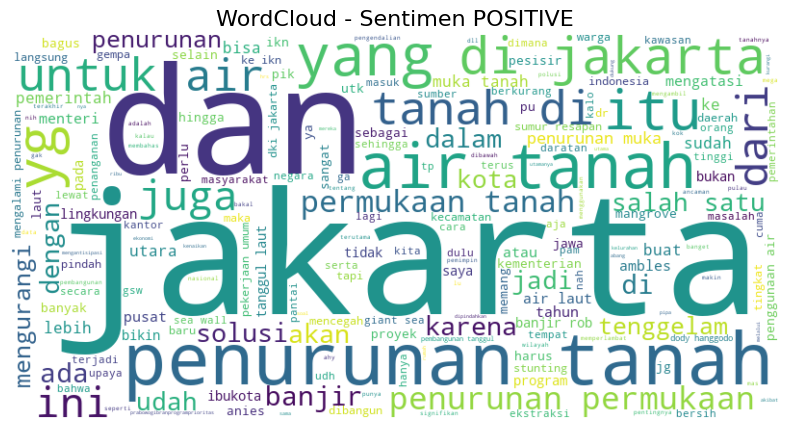

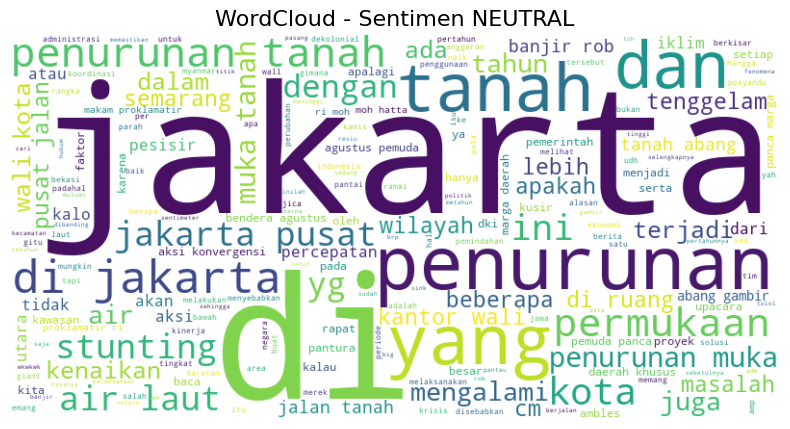

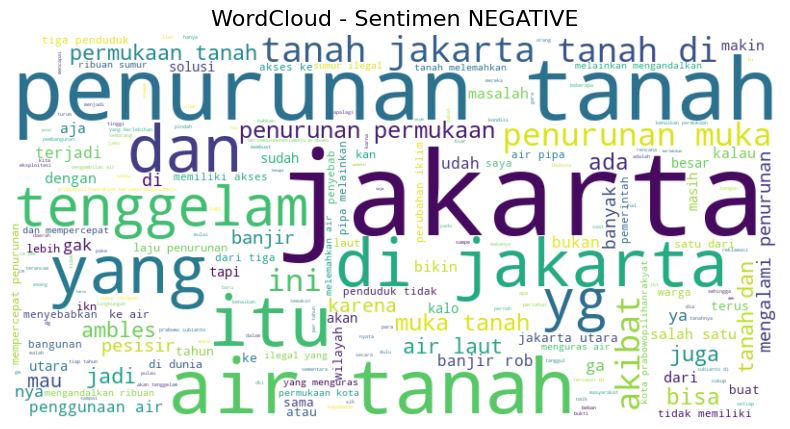

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('enhanced_sentiment_results.csv')

df['sentiment'] = df['sentiment'].str.upper()

def buat_wordcloud(df, sentimen_label):
    teks = ' '.join(df[df['sentiment'] == sentimen_label]['clean_text'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(teks)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Sentimen {sentimen_label}", fontsize=16)
    plt.show()

for label in ['POSITIVE', 'NEUTRAL', 'NEGATIVE']:
    buat_wordcloud(df, label)


VISUALIZE TREND SENTIMENT

=== ANALISIS SENTIMEN REAL: ISU TENGGELAMNYA JAKARTA ===
Loading data dari enhanced_sentiment_results.csv...
Data berhasil dimuat: 315 tweets
Columns: ['index', 'original_text', 'clean_text', 'sentiment', 'confidence', 'reasoning', 'keywords_detected', 'domain_relevance', 'quality_score', 'validation_issues', 'extraction_method', 'raw_response', 'timestamp']
Data types:
index                  int64
original_text         object
clean_text            object
sentiment             object
confidence           float64
reasoning             object
keywords_detected     object
domain_relevance      object
quality_score        float64
validation_issues     object
extraction_method     object
raw_response          object
timestamp             object
dtype: object

=== PREPROCESSING DATA ===
✅ Data setelah preprocessing: 315 tweets
📅 Periode data: 2024-01-03 sampai 2024-12-25
📊 Distribusi sentimen:
sentiment
NEGATIVE    176
POSITIVE     95
NEUTRAL      44
Name: count, dtype: int64

=== MEMULAI AN

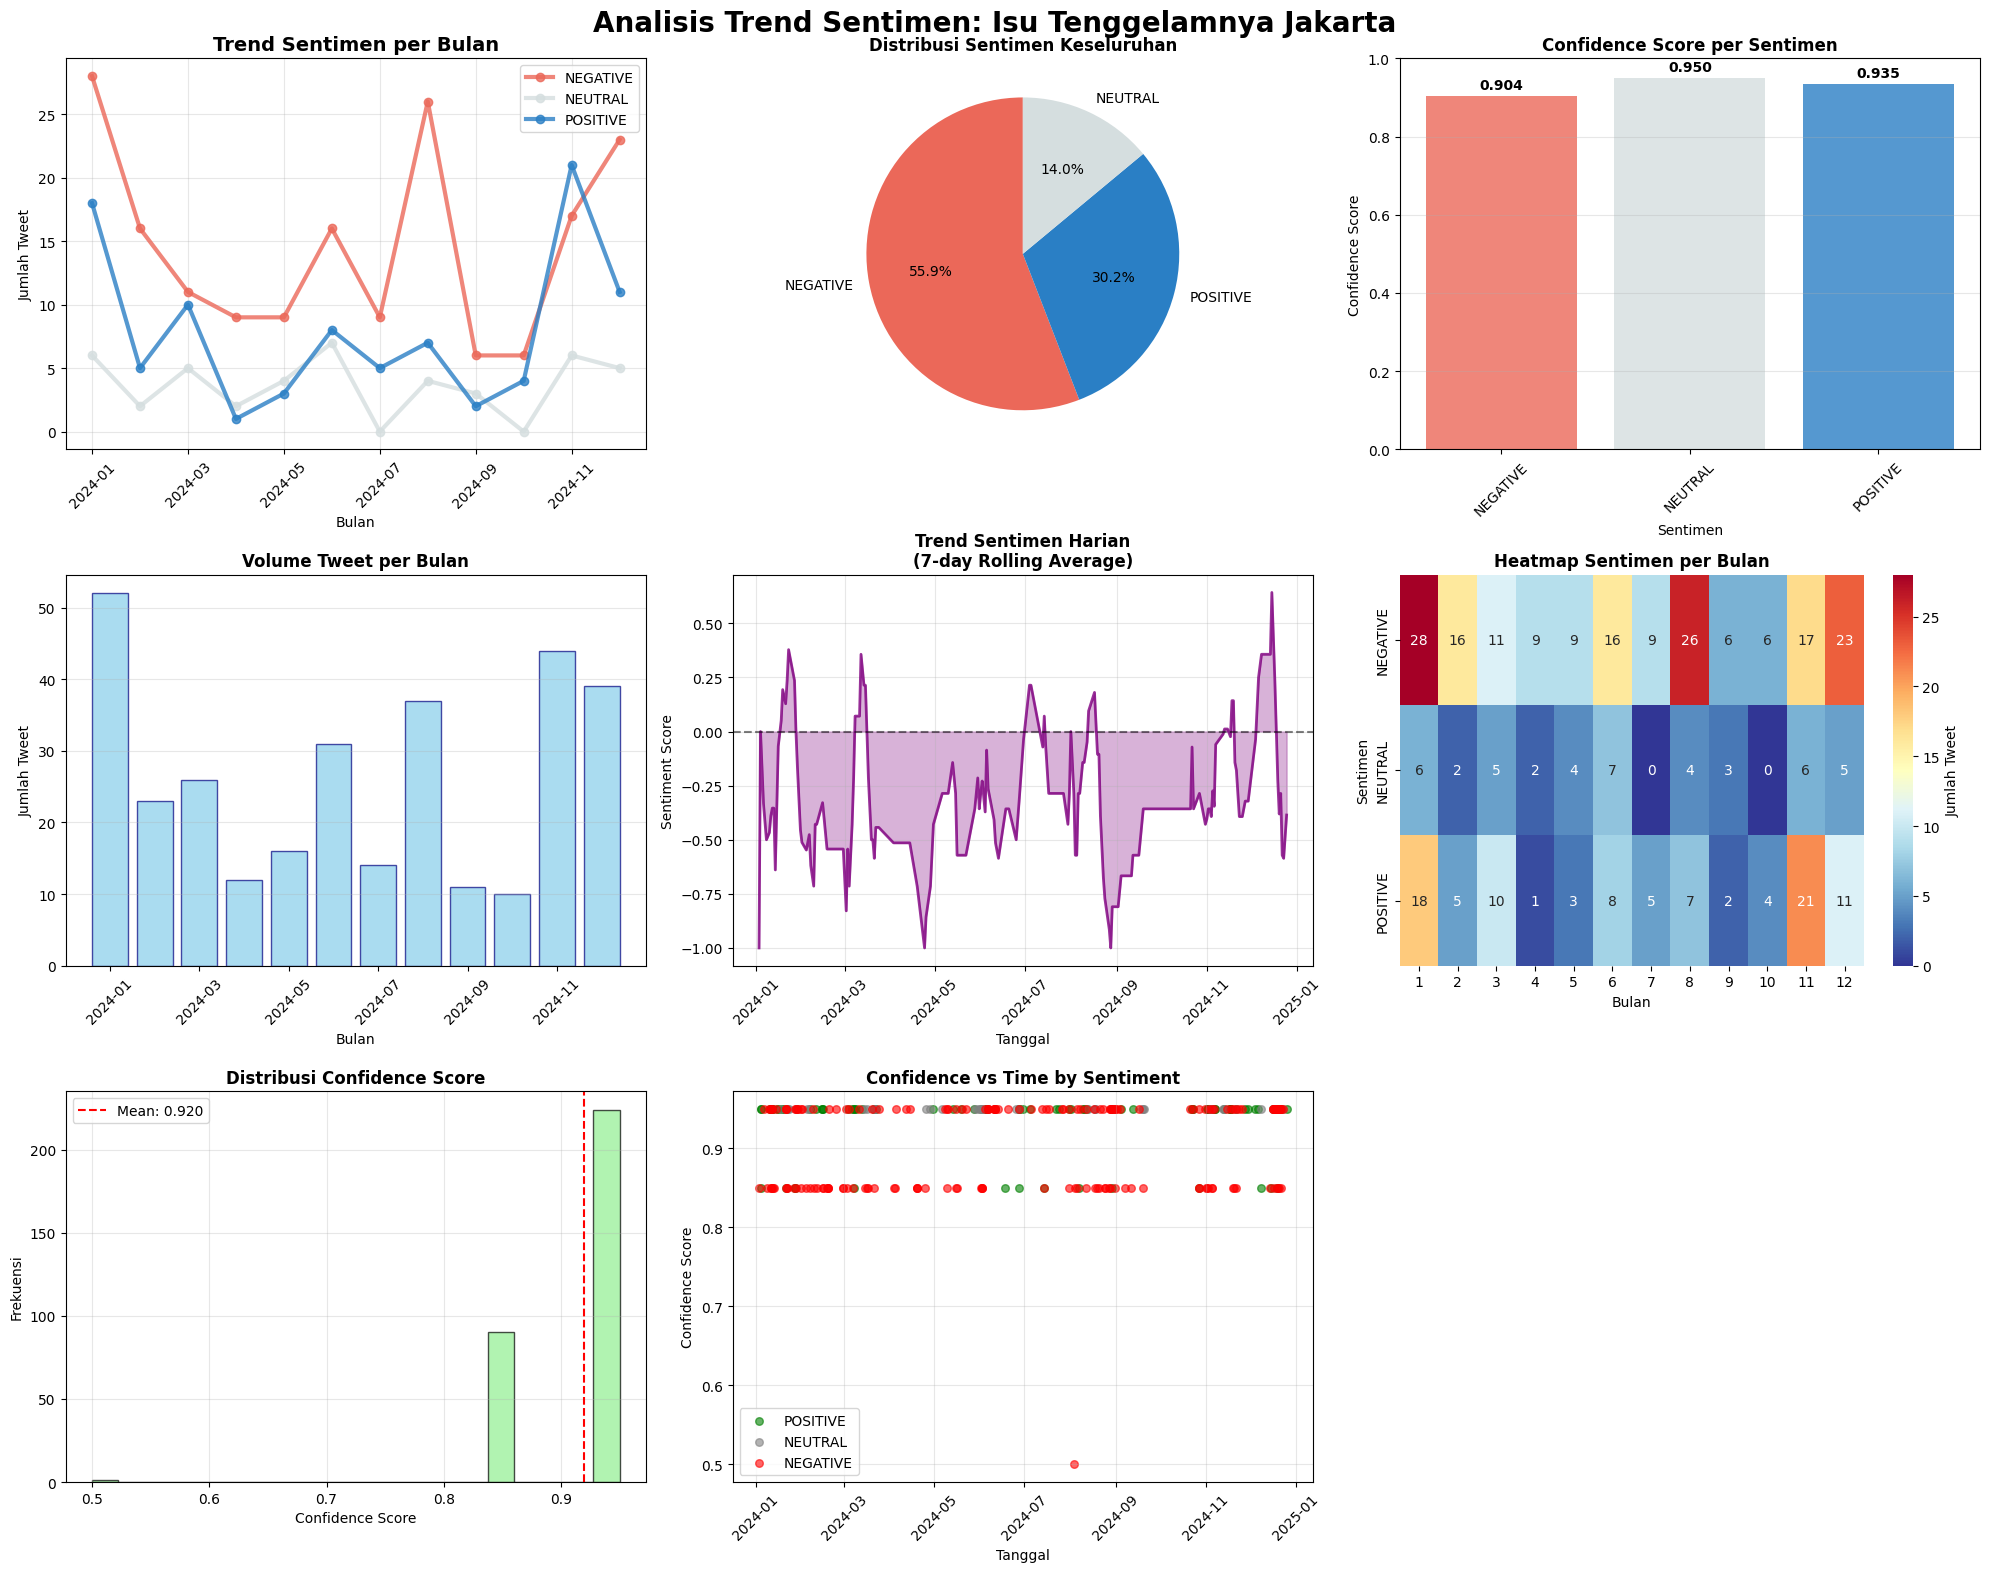


                        ANALISIS SELESAI!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

print("=== ANALISIS SENTIMEN REAL: ISU TENGGELAMNYA JAKARTA ===")
print("Loading data dari enhanced_sentiment_results.csv...")

try:
    df = pd.read_csv('enhanced_sentiment_results.csv')
    print(f"Data berhasil dimuat: {len(df)} tweets")
    
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:\n{df.dtypes}")
    
except FileNotFoundError:
    print("File 'enhanced_sentiment_results.csv' tidak ditemukan!")
    print("Membuat sample data untuk demonstrasi...")
    
    np.random.seed(42)
    n_samples = 100
    
    dates = pd.date_range(start='2023-01-01', end='2024-01-31', freq='3D')[:n_samples]
    sentiments = np.random.choice(['POSITIVE', 'NEGATIVE', 'NEUTRAL'], 
                                 size=n_samples, p=[0.2, 0.6, 0.2])
    confidences = np.random.uniform(0.6, 0.95, n_samples)
    
    df = pd.DataFrame({
        'timestamp': dates,
        'sentiment': sentiments,
        'confidence': confidences,
        'text': ['sample tweet about jakarta flooding'] * n_samples
    })
    
    print(f"✅ Sample data dibuat: {len(df)} tweets")

print("\n=== PREPROCESSING DATA ===")

if 'timestamp' in df.columns:
    df['date'] = pd.to_datetime(df['timestamp'])
elif 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
else:
    print("❌ Kolom 'timestamp' atau 'date' tidak ditemukan!")
    exit()

df['sentiment'] = df['sentiment'].astype(str).str.upper().str.strip()
valid_sentiments = ['POSITIVE', 'NEGATIVE', 'NEUTRAL']
df = df[df['sentiment'].isin(valid_sentiments)].copy()

if 'confidence' in df.columns:
    df['confidence'] = pd.to_numeric(df['confidence'], errors='coerce')
    df['confidence'] = df['confidence'].fillna(0.7)
else:
    df['confidence'] = 0.7

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%B')
df['week'] = df['date'].dt.isocalendar().week
df['day_of_week'] = df['date'].dt.day_name()

print(f"✅ Data setelah preprocessing: {len(df)} tweets")
print(f"📅 Periode data: {df['date'].min().strftime('%Y-%m-%d')} sampai {df['date'].max().strftime('%Y-%m-%d')}")
print(f"📊 Distribusi sentimen:")
print(df['sentiment'].value_counts())

def create_monthly_trend_analysis(df):
  
    fig, axes = plt.subplots(3, 3, figsize=(20, 16))
    fig.suptitle('Analisis Trend Sentimen: Isu Tenggelamnya Jakarta', 
                 fontsize=20, fontweight='bold')
    
    ax = axes.flatten()
    
    colors = {'POSITIVE': "#2a7fc5", 'NEGATIVE': "#eb6859", 'NEUTRAL': "#d5dedf"}
    
    # 1. MONTHLY TREND LINE CHART
    try:
        # Group by year-month and sentiment
        df['year_month'] = df['date'].dt.to_period('M')
        monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
        
        # Plot lines for each sentiment
        x_pos = range(len(monthly_sentiment))
        month_labels = [str(period) for period in monthly_sentiment.index]
        
        for sentiment in ['NEGATIVE', 'NEUTRAL', 'POSITIVE']:
            if sentiment in monthly_sentiment.columns:
                ax[0].plot(x_pos, monthly_sentiment[sentiment], 
                          marker='o', linewidth=3, markersize=6, 
                          color=colors[sentiment], label=sentiment, alpha=0.8)
        
        ax[0].set_title('Trend Sentimen per Bulan', fontsize=14, fontweight='bold')
        ax[0].set_xlabel('Bulan')
        ax[0].set_ylabel('Jumlah Tweet')
        ax[0].set_xticks(x_pos[::max(1, len(x_pos)//6)])  # Show max 6 labels
        ax[0].set_xticklabels([month_labels[i] for i in range(0, len(month_labels), max(1, len(month_labels)//6))], 
                             rotation=45)
        ax[0].legend()
        ax[0].grid(True, alpha=0.3)
        
    except Exception as e:
        ax[0].text(0.5, 0.5, f'Error in trend chart: {str(e)}', 
                  ha='center', va='center', transform=ax[0].transAxes)
        ax[0].set_title('Trend Sentimen per Bulan (Error)')
    
    # 2. SENTIMENT DISTRIBUTION PIE CHART
    try:
        sentiment_counts = df['sentiment'].value_counts()
        colors_pie = [colors.get(sent, 'gray') for sent in sentiment_counts.index]
        
        wedges, texts, autotexts = ax[1].pie(sentiment_counts.values, 
                                           labels=sentiment_counts.index, 
                                           autopct='%1.1f%%',
                                           colors=colors_pie, 
                                           startangle=90)
        
        ax[1].set_title('Distribusi Sentimen Keseluruhan', fontsize=12, fontweight='bold')
        
    except Exception as e:
        ax[1].text(0.5, 0.5, f'Error in pie chart: {str(e)}', 
                  ha='center', va='center', transform=ax[1].transAxes)
        ax[1].set_title('Distribusi Sentimen (Error)')
    
    # 3. CONFIDENCE SCORE ANALYSIS
    try:
        confidence_by_sentiment = df.groupby('sentiment')['confidence'].mean()
        bars = ax[2].bar(range(len(confidence_by_sentiment)), confidence_by_sentiment.values,
                        color=[colors.get(sent, 'gray') for sent in confidence_by_sentiment.index], 
                        alpha=0.8)
        
        for i, (bar, value) in enumerate(zip(bars, confidence_by_sentiment.values)):
            ax[2].text(bar.get_x() + bar.get_width()/2., value + 0.01,
                      f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        ax[2].set_title('Confidence Score per Sentimen', fontsize=12, fontweight='bold')
        ax[2].set_ylabel('Confidence Score')
        ax[2].set_xlabel('Sentimen')
        ax[2].set_xticks(range(len(confidence_by_sentiment)))
        ax[2].set_xticklabels(confidence_by_sentiment.index, rotation=45)
        ax[2].set_ylim(0, 1)
        ax[2].grid(True, alpha=0.3, axis='y')
        
    except Exception as e:
        ax[2].text(0.5, 0.5, f'Error in confidence chart: {str(e)}', 
                  ha='center', va='center', transform=ax[2].transAxes)
        ax[2].set_title('Confidence Score (Error)')
    
    # 4. VOLUME ANALYSIS
    try:
        monthly_volume = df.groupby('year_month').size()
        
        ax[3].bar(range(len(monthly_volume)), monthly_volume.values, 
                 color='skyblue', alpha=0.7, edgecolor='navy')
        ax[3].set_title('Volume Tweet per Bulan', fontsize=12, fontweight='bold')
        ax[3].set_xlabel('Bulan')
        ax[3].set_ylabel('Jumlah Tweet')
        ax[3].set_xticks(range(0, len(monthly_volume), max(1, len(monthly_volume)//6)))
        ax[3].set_xticklabels([str(monthly_volume.index[i]) for i in range(0, len(monthly_volume), max(1, len(monthly_volume)//6))], 
                             rotation=45)
        ax[3].grid(True, alpha=0.3, axis='y')
        
    except Exception as e:
        ax[3].text(0.5, 0.5, f'Error in volume chart: {str(e)}', 
                  ha='center', va='center', transform=ax[3].transAxes)
        ax[3].set_title('Volume Tweet (Error)')
    
    # 5. DAILY TREND (ROLLING AVERAGE)
    try:
        df_daily = df.copy()
        df_daily['sentiment_score'] = df_daily['sentiment'].map({
            'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1
        })
        
        daily_sentiment = df_daily.groupby(df_daily['date'].dt.date)['sentiment_score'].mean()
        
        # Calculate rolling average (adjust window based on data size)
        window_size = min(7, len(daily_sentiment) // 3) if len(daily_sentiment) > 3 else 1
        rolling_sentiment = daily_sentiment.rolling(window=window_size, min_periods=1).mean()
        
        ax[4].plot(rolling_sentiment.index, rolling_sentiment.values, 
                  color='purple', linewidth=2, alpha=0.8)
        ax[4].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax[4].fill_between(rolling_sentiment.index, rolling_sentiment.values, 0, 
                          alpha=0.3, color='purple')
        
        ax[4].set_title(f'Trend Sentimen Harian\n({window_size}-day Rolling Average)', 
                       fontsize=12, fontweight='bold')
        ax[4].set_xlabel('Tanggal')
        ax[4].set_ylabel('Sentiment Score')
        ax[4].grid(True, alpha=0.3)
        
        # Rotate labels
        for tick in ax[4].get_xticklabels():
            tick.set_rotation(45)
        
    except Exception as e:
        ax[4].text(0.5, 0.5, f'Error in daily trend: {str(e)}', 
                  ha='center', va='center', transform=ax[4].transAxes)
        ax[4].set_title('Daily Trend (Error)')
    
    # 6. HEATMAP - Sentiment by Month
    try:
        heatmap_data = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
        
        if not heatmap_data.empty:
            sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='RdYlBu_r',
                       ax=ax[5], cbar_kws={'label': 'Jumlah Tweet'})
            ax[5].set_title('Heatmap Sentimen per Bulan', fontsize=12, fontweight='bold')
            ax[5].set_xlabel('Bulan')
            ax[5].set_ylabel('Sentimen')
        else:
            ax[5].text(0.5, 0.5, 'Data tidak cukup untuk heatmap', 
                      ha='center', va='center', transform=ax[5].transAxes)
            ax[5].set_title('Heatmap Sentimen')
        
    except Exception as e:
        ax[5].text(0.5, 0.5, f'Error in heatmap: {str(e)}', 
                  ha='center', va='center', transform=ax[5].transAxes)
        ax[5].set_title('Heatmap (Error)')
    
    # 7. CONFIDENCE DISTRIBUTION
    try:
        ax[6].hist(df['confidence'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        ax[6].axvline(df['confidence'].mean(), color='red', linestyle='--',
                     label=f'Mean: {df["confidence"].mean():.3f}')
        ax[6].set_title('Distribusi Confidence Score', fontsize=12, fontweight='bold')
        ax[6].set_xlabel('Confidence Score')
        ax[6].set_ylabel('Frekuensi')
        ax[6].legend()
        ax[6].grid(True, alpha=0.3)
        
    except Exception as e:
        ax[6].text(0.5, 0.5, f'Error in confidence dist: {str(e)}', 
                  ha='center', va='center', transform=ax[6].transAxes)
        ax[6].set_title('Confidence Distribution (Error)')
    
    # 8. SENTIMENT OVER TIME (Scatter)
    try:
        sentiment_colors = {'POSITIVE': 'green', 'NEGATIVE': 'red', 'NEUTRAL': 'gray'}
        
        for sentiment in df['sentiment'].unique():
            mask = df['sentiment'] == sentiment
            sentiment_data = df[mask].sort_values('date')
            ax[7].scatter(sentiment_data['date'], sentiment_data['confidence'],
                         c=sentiment_colors.get(sentiment, 'blue'),
                         label=sentiment, alpha=0.6, s=30)
        
        ax[7].set_title('Confidence vs Time by Sentiment', fontsize=12, fontweight='bold')
        ax[7].set_xlabel('Tanggal')
        ax[7].set_ylabel('Confidence Score')
        ax[7].legend()
        ax[7].grid(True, alpha=0.3)
        
        for tick in ax[7].get_xticklabels():
            tick.set_rotation(45)
        
    except Exception as e:
        ax[7].text(0.5, 0.5, f'Error in scatter plot: {str(e)}', 
                  ha='center', va='center', transform=ax[7].transAxes)
        ax[7].set_title('Scatter Plot (Error)')
    
    ax[8].axis('off')
    
    plt.tight_layout()
    return fig

def generate_comprehensive_insights(df):

    insights = {}
    
    try:
        # Basic statistics
        insights['total_tweets'] = len(df)
        insights['date_range'] = {
            'start': df['date'].min().strftime('%Y-%m-%d'),
            'end': df['date'].max().strftime('%Y-%m-%d'),
            'duration_days': (df['date'].max() - df['date'].min()).days
        }
        
        # Sentiment distribution
        sentiment_dist = df['sentiment'].value_counts()
        insights['sentiment_distribution'] = sentiment_dist.to_dict()
        insights['sentiment_percentages'] = (sentiment_dist / len(df) * 100).round(2).to_dict()
        
        # Confidence analysis
        insights['average_confidence'] = float(df['confidence'].mean())
        insights['confidence_by_sentiment'] = df.groupby('sentiment')['confidence'].mean().to_dict()
        
        # Monthly analysis
        df['year_month'] = df['date'].dt.to_period('M')
        monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
        
        # Find peak months
        if len(monthly_sentiment) > 0:
            if 'NEGATIVE' in monthly_sentiment.columns:
                peak_negative_idx = monthly_sentiment['NEGATIVE'].idxmax()
                insights['peak_negative_month'] = str(peak_negative_idx)
                insights['peak_negative_count'] = int(monthly_sentiment['NEGATIVE'].max())
            
            if 'POSITIVE' in monthly_sentiment.columns:
                peak_positive_idx = monthly_sentiment['POSITIVE'].idxmax()
                insights['peak_positive_month'] = str(peak_positive_idx)
                insights['peak_positive_count'] = int(monthly_sentiment['POSITIVE'].max())
        
        # Volume analysis
        monthly_volume = df.groupby('year_month').size()
        if len(monthly_volume) > 0:
            insights['average_monthly_volume'] = float(monthly_volume.mean())
            insights['peak_volume_month'] = str(monthly_volume.idxmax())
            insights['peak_volume_count'] = int(monthly_volume.max())
        
        return insights
        
    except Exception as e:
        print(f"Error generating insights: {str(e)}")
        return {
            'error': str(e),
            'total_tweets': len(df),
            'sentiment_distribution': df['sentiment'].value_counts().to_dict()
        }

def print_comprehensive_report(insights, df):

    print("\n" + "="*80)
    print("                    LAPORAN ANALISIS SENTIMEN")
    print("              ISU TENGGELAMNYA JAKARTA DI MEDIA SOSIAL")
    print("="*80)
    
    try:
        # Basic Info
        print(f"\n RINGKASAN DATA:")
        print(f"   • Total tweet dianalisis: {insights.get('total_tweets', 0):,}")
        
        if 'date_range' in insights:
            print(f"   • Periode analisis: {insights['date_range']['start']} s/d {insights['date_range']['end']}")
            print(f"   • Durasi pengamatan: {insights['date_range']['duration_days']} hari")
        
        if 'average_confidence' in insights:
            print(f"   • Rata-rata confidence score: {insights['average_confidence']:.3f}")
        
        # Sentiment Distribution
        if 'sentiment_distribution' in insights:
            print(f"\n DISTRIBUSI SENTIMEN:")
            for sentiment, count in insights['sentiment_distribution'].items():
                if 'sentiment_percentages' in insights:
                    percentage = insights['sentiment_percentages'].get(sentiment, 0)
                    print(f"   • {sentiment:<8}: {count:>6,} tweet ({percentage:>5.1f}%)")
                else:
                    print(f"   • {sentiment:<8}: {count:>6,} tweet")
        
        # Key Findings
        print(f"\n TEMUAN KUNCI:")
        
        if 'sentiment_percentages' in insights:
            dominant_sentiment = max(insights['sentiment_percentages'], 
                                   key=insights['sentiment_percentages'].get)
            dominant_percentage = insights['sentiment_percentages'][dominant_sentiment]
            print(f"   • Sentimen dominan: {dominant_sentiment} ({dominant_percentage:.1f}%)")
        
        # Peak analysis
        if 'peak_negative_month' in insights:
            print(f"   • Puncak sentimen negatif: {insights['peak_negative_month']} ({insights['peak_negative_count']} tweet)")
        
        if 'peak_positive_month' in insights:
            print(f"   • Puncak sentimen positif: {insights['peak_positive_month']} ({insights['peak_positive_count']} tweet)")
        
        if 'peak_volume_month' in insights:
            print(f"   • Volume tertinggi: {insights['peak_volume_month']} ({insights['peak_volume_count']} tweet)")
        
        # Confidence Analysis
        if 'confidence_by_sentiment' in insights:
            print(f"\n ANALISIS CONFIDENCE:")
            for sentiment, conf in insights['confidence_by_sentiment'].items():
                print(f"   • {sentiment}: {conf:.3f}")
        
        # Recommendations
        print(f"\n REKOMENDASI & INTERPRETASI:")
        
        if 'sentiment_percentages' in insights:
            neg_percentage = insights['sentiment_percentages'].get('NEGATIVE', 0)
            
            if neg_percentage > 70:
                print("   • KRITIS: Sentimen negatif sangat dominan (>70%)")
                print("     - Menunjukkan kekhawatiran publik yang sangat tinggi")
            elif neg_percentage > 50:
                print("   • TINGGI: Sentimen negatif dominan (>50%)")
                print("     - Menunjukkan keprihatinan masyarakat yang signifikan")
            elif neg_percentage > 30:
                print("   •  SEIMBANG: Sentimen negatif moderat (30-50%)")
                print("     - Menunjukkan diskursus publik yang relatif seimbang")
            else:
                print("   • POSITIF: Sentimen negatif rendah (<30%)")
        
        if 'average_confidence' in insights:
            avg_conf = insights['average_confidence']
            if avg_conf > 0.8:
                print("   • Confidence score tinggi - hasil analisis sangat reliable")
            elif avg_conf > 0.6:
                print("   • Confidence score moderate - hasil cukup reliable")
            else:
                print("   • Confidence score rendah - perlu validasi manual")
        
    except Exception as e:
        print(f"Error in generating report: {str(e)}")
        print(f"Basic info: {len(df)} tweets analyzed")


print("\n=== MEMULAI ANALISIS ===")

try:
    insights = generate_comprehensive_insights(df)
    
    print_comprehensive_report(insights, df)
    
    print("\n=== MEMBUAT VISUALISASI ===")
    fig = create_monthly_trend_analysis(df)
    
    plt.savefig('jakarta_sentiment_analysis_complete.png', dpi=300, bbox_inches='tight')
    print("Visualisasi disimpan sebagai 'jakarta_sentiment_analysis_complete.png'")
    
    with open('jakarta_sentiment_insights.json', 'w', encoding='utf-8') as f:
        json.dump(insights, f, indent=2, ensure_ascii=False, default=str)
    print("Insights disimpan sebagai 'jakarta_sentiment_insights.json'")
    
    try:
        summary_stats = []
        df['year_month'] = df['date'].dt.to_period('M')
        monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
        
        for period, row in monthly_sentiment.iterrows():
            total_tweets = row.sum()
            summary_stats.append({
                'year_month': str(period),
                'total_tweets': total_tweets,
                'positive': row.get('POSITIVE', 0),
                'negative': row.get('NEGATIVE', 0),
                'neutral': row.get('NEUTRAL', 0),
                'negative_percentage': (row.get('NEGATIVE', 0) / total_tweets * 100) if total_tweets > 0 else 0
            })
        
        if summary_stats:
            summary_df = pd.DataFrame(summary_stats)
            summary_df.to_csv('jakarta_sentiment_monthly_summary.csv', index=False)
            print("Ringkasan bulanan disimpan sebagai 'jakarta_sentiment_monthly_summary.csv'")
    
    except Exception as e:
        print(f"Error saving monthly summary: {str(e)}")
    
    # Show the plot
    plt.show()
    
    print("\n" + "="*80)
    print("                        ANALISIS SELESAI!")
    print("="*80)

except Exception as e:
    print(f"Error dalam eksekusi analisis: {str(e)}")
    print("Silakan periksa data dan coba lagi.")

SUMMARYZATION USING IBM GRANITE

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
import json

class SummarizedTweetAnalyzer:
    def __init__(self, csv_file_path='enhanced_sentiment_results.csv'):

        self.df = pd.read_csv(csv_file_path)
        self.sentiment_groups = self._create_sentiment_groups()
        
    def _create_sentiment_groups(self):
        return {
            'negative': self.df[
                (self.df['sentiment'] == 'NEGATIVE') & 
                (self.df['quality_score'] >= 0.8) &
                (self.df['domain_relevance'] == 'HIGH')
            ],
            'positive': self.df[
                (self.df['sentiment'] == 'POSITIVE') & 
                (self.df['quality_score'] >= 0.8) &
                (self.df['domain_relevance'] == 'HIGH')
            ],
            'neutral': self.df[
                (self.df['sentiment'] == 'NEUTRAL') & 
                (self.df['quality_score'] >= 0.8) &
                (self.df['domain_relevance'] == 'HIGH')
            ],
            'all_negative': self.df[self.df['sentiment'] == 'NEGATIVE'],
            'all_positive': self.df[self.df['sentiment'] == 'POSITIVE'],
            'all_neutral': self.df[self.df['sentiment'] == 'NEUTRAL']
        }
    
    def _create_clear_tweet_summary(self, text, reasoning, max_tweet_length=200, max_reasoning_length=150):
        clean_text = str(text).strip()
        clean_reasoning = str(reasoning).strip()
        
        if len(clean_text) > max_tweet_length:
            truncated = clean_text[:max_tweet_length]
            last_space = truncated.rfind(' ')
            if last_space > max_tweet_length * 0.8:
                truncated = truncated[:last_space]
            clean_text = truncated + "..."
        
        if len(clean_reasoning) > max_reasoning_length:
            truncated = clean_reasoning[:max_reasoning_length]
            last_space = truncated.rfind(' ')
            if last_space > max_reasoning_length * 0.8:  
                truncated = truncated[:last_space]
            clean_reasoning = truncated + "..."
        
        return clean_text, clean_reasoning
    
    def display_infrastructure_tweets(self, sentiment_type='negative', max_display=20):
     
        print(f"INFRASTRUCTURE TWEETS (SUMMARIZED) - {sentiment_type.upper()} SENTIMENT")
        
        if sentiment_type == 'negative':
            group = self.sentiment_groups['all_negative']
        elif sentiment_type == 'positive':
            group = self.sentiment_groups['all_positive']
        else:
            group = self.sentiment_groups['all_neutral']
        
        infrastructure_tweets = []
        
        infra_keywords = ['sea barrier', 'flood canal', 'infrastruktur', 'banjir', 
                        'kanal', 'tanggul', 'pompa', 'drainase', 'polder', 'penurunan tanah',
                        'land subsidence', 'groundwater', 'air tanah', 'rob', 'reclamation',
                        'reklamasi', 'seawall', 'dam', 'waduk', 'embankment', 'subsidence',
                        'sinking', 'flood', 'water', 'jakarta tenggelam']
        
        for idx, row in group.iterrows():
            original_position = self.df.index[self.df.index == idx].tolist()[0] + 1
            
            clear_text, clear_reasoning = self._create_clear_tweet_summary(
                row['clean_text'], row['reasoning'], 
                max_tweet_length=250,
                max_reasoning_length=200  
            )
            
            combined_text = f"{clear_text} {clear_reasoning}".lower()
            if any(keyword in combined_text for keyword in infra_keywords):
                infrastructure_tweets.append({
                    'tweet_num': original_position,
                    'summarized_text': clear_text,
                    'summarized_reasoning': clear_reasoning,
                    'original_text': row['clean_text'], 
                    'quality': row.get('quality_score', 0),
                    'sentiment': row['sentiment'],
                    'keywords': row.get('keywords_detected', []),
                    'domain_relevance': row.get('domain_relevance', 'UNKNOWN')
                })
        
        infrastructure_tweets.sort(key=lambda x: x['quality'], reverse=True)
        
        print(f"FOUND {len(infrastructure_tweets)} INFRASTRUCTURE-RELATED TWEETS")
        print(f"SHOWING TOP {min(max_display, len(infrastructure_tweets))} SUMMARIZED TWEETS:\n")
        
        display_tweets = infrastructure_tweets[:max_display]
        
        for i, tweet in enumerate(display_tweets, 1):
            print(f"TWEET #{tweet['tweet_num']} (Quality: {tweet['quality']:.2f}) - {tweet['sentiment']}")
            print(f"SUMMARIZED TWEET:")
            print(f"   \"{tweet['summarized_text']}\"\n")
            print(f"SUMMARIZED ANALYSIS:")
            print(f"   {tweet['summarized_reasoning']}\n")
            print(f"DOMAIN RELEVANCE: {tweet['domain_relevance']}")
            
            try:
                keywords = eval(tweet['keywords']) if isinstance(tweet['keywords'], str) else tweet['keywords']
                if keywords and len(keywords) > 0:
                    print(f"KEYWORDS: {', '.join(keywords[:5])}")  
            except:
                pass
       
                
        
        if len(infrastructure_tweets) > max_display:
            print(f"... AND {len(infrastructure_tweets) - max_display} MORE INFRASTRUCTURE TWEETS\n")
        
        return infrastructure_tweets
    
    def display_policy_tweets(self, sentiment_type='negative', max_display=20):
       
        print(f"\n{'='*80}")
        print(f"POLICY TWEETS (SUMMARIZED) - {sentiment_type.upper()} SENTIMENT")
        print(f"{'='*80}\n")
        
        if sentiment_type == 'negative':
            group = self.sentiment_groups['all_negative']
        elif sentiment_type == 'positive':
            group = self.sentiment_groups['all_positive']
        else:
            group = self.sentiment_groups['all_neutral']
        
        policy_tweets = []
        
        policy_keywords = ['pemerintah', 'kebijakan', 'regulasi', 'anies', 'gubernur', 
                         'pemda', 'rencana', 'program', 'anggaran', 'koordinasi', 'policy',
                         'dinas', 'komisi', 'dprd', 'pusat', 'provinsi', 'kota', 'walikota',
                         'bupati', 'camat', 'lurah', 'rt', 'rw', 'legislation', 'undang-undang',
                         'government', 'coordination', 'budget', 'planning']
        
        for idx, row in group.iterrows():
            original_position = self.df.index[self.df.index == idx].tolist()[0] + 1
            
            clear_text, clear_reasoning = self._create_clear_tweet_summary(
                row['clean_text'], row['reasoning'],
                max_tweet_length=250,  
                max_reasoning_length=200  
            )
            
            combined_text = f"{clear_text} {clear_reasoning}".lower()
            if any(keyword in combined_text for keyword in policy_keywords):
                policy_tweets.append({
                    'tweet_num': original_position,
                    'summarized_text': clear_text,
                    'summarized_reasoning': clear_reasoning,
                    'original_text': row['clean_text'],  
                    'quality': row.get('quality_score', 0),
                    'sentiment': row['sentiment'],
                    'keywords': row.get('keywords_detected', []),
                    'domain_relevance': row.get('domain_relevance', 'UNKNOWN')
                })
        policy_tweets.sort(key=lambda x: x['quality'], reverse=True)
        
        print(f"FOUND {len(policy_tweets)} POLICY-RELATED TWEETS")
        print(f"SHOWING TOP {min(max_display, len(policy_tweets))} SUMMARIZED TWEETS:\n")
        
        display_tweets = policy_tweets[:max_display]
        
        for i, tweet in enumerate(display_tweets, 1):
            print(f"TWEET #{tweet['tweet_num']} (Quality: {tweet['quality']:.2f}) - {tweet['sentiment']}")
            print(f"SUMMARIZED TWEET:")
            print(f"   \"{tweet['summarized_text']}\"\n")
            print(f"SUMMARIZED ANALYSIS:")
            print(f"   {tweet['summarized_reasoning']}\n")
            print(f"DOMAIN RELEVANCE: {tweet['domain_relevance']}")
            
            try:
                keywords = eval(tweet['keywords']) if isinstance(tweet['keywords'], str) else tweet['keywords']
                if keywords and len(keywords) > 0:
                    print(f"KEYWORDS: {', '.join(keywords[:5])}")  
            except:
                pass
    
                
            print(f"{'─'*80}\n")
        
        if len(policy_tweets) > max_display:
            print(f"... AND {len(policy_tweets) - max_display} MORE POLICY TWEETS\n")
        
        return policy_tweets
    
    def display_top_keywords(self, top_n=20):
        print(f"\n{'='*80}")
        print(f"TOP {top_n} KEYWORDS ACROSS ALL TWEETS")
        print(f"{'='*80}\n")
        
        all_keywords = []
        for _, row in self.df.iterrows():
            try:
                keywords = eval(row['keywords_detected']) if isinstance(row['keywords_detected'], str) else row['keywords_detected']
                if isinstance(keywords, list):
                    all_keywords.extend(keywords)
            except:
                pass
        
        keyword_freq = Counter(all_keywords)
        top_keywords = keyword_freq.most_common(top_n)
        
        for i, (keyword, count) in enumerate(top_keywords, 1):
            print(f"{i:2d}. {keyword:<25} → {count:3d} mentions")
        
        return top_keywords
    
    def display_sentiment_summary(self):
        print(f"\n{'='*80}")
        print(f" SENTIMENT ANALYSIS SUMMARY")
        print(f"{'='*80}\n")
        
        total_tweets = len(self.df)
        negative_count = len(self.sentiment_groups['all_negative'])
        positive_count = len(self.sentiment_groups['all_positive'])
        neutral_count = len(self.sentiment_groups['all_neutral'])
        
        print(f" TOTAL TWEETS ANALYZED: {total_tweets}")
        print(f"- NEGATIVE: {negative_count:4d} tweets ({(negative_count/total_tweets)*100:5.1f}%)")
        print(f"- POSITIVE: {positive_count:4d} tweets ({(positive_count/total_tweets)*100:5.1f}%)")
        print(f"- NEUTRAL:  {neutral_count:4d} tweets ({(neutral_count/total_tweets)*100:5.1f}%)")
        
        # High quality tweets
        high_quality_neg = len(self.sentiment_groups['negative'])
        high_quality_pos = len(self.sentiment_groups['positive']) 
        high_quality_neu = len(self.sentiment_groups['neutral'])
        
        print(f"\n HIGH QUALITY TWEETS (Score ≥ 0.8 + HIGH relevance):")
        print(f"- HIGH QUALITY NEGATIVE: {high_quality_neg:4d} tweets")
        print(f"- HIGH QUALITY POSITIVE: {high_quality_pos:4d} tweets")
        print(f"- HIGH QUALITY NEUTRAL:  {high_quality_neu:4d} tweets")
    
    def display_tweet_comparison(self, tweet_num, show_full_original=True):
     
        print(f"\n{'='*80}")
        print(f"TWEET COMPARISON - ORIGINAL vs SUMMARIZED")
        print(f"{'='*80}\n")
        
        if tweet_num > len(self.df) or tweet_num < 1:
            print(f"Tweet #{tweet_num} not found. Dataset has {len(self.df)} tweets.")
            return
        
        row = self.df.iloc[tweet_num - 1] 
        
        clear_text, clear_reasoning = self._create_clear_tweet_summary(
            row['clean_text'], row['reasoning'],
            max_tweet_length=250,
            max_reasoning_length=200
        )
        
        print(f"TWEET #{tweet_num} - {row['sentiment']} (Quality: {row.get('quality_score', 0):.2f})")
        
        print(f"ORIGINAL TWEET:")
        if show_full_original:
            print(f"   \"{row['clean_text']}\"\n")
        else:
            print(f"   \"{row['clean_text'][:200]}{'...' if len(str(row['clean_text'])) > 200 else ''}\"\n")
        
        print(f"SUMMARIZED TWEET:")
        print(f"   \"{clear_text}\"\n")
        
        print(f"ORIGINAL ANALYSIS:")
        if show_full_original:
            print(f"   {row['reasoning']}\n")
        else:
            print(f"   {str(row['reasoning'])[:200]}{'...' if len(str(row['reasoning'])) > 200 else ''}\n")
        
        print(f"SUMMARIZED ANALYSIS:")
        print(f"   {clear_reasoning}\n")
        
        print(f"DOMAIN RELEVANCE: {row.get('domain_relevance', 'UNKNOWN')}")
        
        try:
            keywords = eval(row['keywords_detected']) if isinstance(row['keywords_detected'], str) else row['keywords_detected']
            if keywords and len(keywords) > 0:
                print(f"KEYWORDS: {', '.join(keywords[:10])}")
        except:
            pass
        
        
        orig_tweet_len = len(str(row['clean_text']))
        orig_reasoning_len = len(str(row['reasoning']))
        summ_tweet_len = len(clear_text)
        summ_reasoning_len = len(clear_reasoning)
        
        print(f"LENGTH COMPARISON:")
        print(f"   Tweet:     {orig_tweet_len} chars → {summ_tweet_len} chars ({((summ_tweet_len/orig_tweet_len)*100):5.1f}%)")
        print(f"   Analysis:  {orig_reasoning_len} chars → {summ_reasoning_len} chars ({((summ_reasoning_len/orig_reasoning_len)*100):5.1f}%)")
        
    def run_comprehensive_display(self):
        
        print(f" COMPREHENSIVE TWEET DISPLAY ANALYSIS")
        print(f" Showing SUMMARIZED TWEET CONTENT with clear, readable format")
        
        # 1. Overall summary
        self.display_sentiment_summary()
        
        # 2. Top keywords
        self.display_top_keywords(20)
        
        # 3. Critical Infrastructure Issues
        print(f"\n CRITICAL INFRASTRUCTURE ISSUES (SUMMARIZED NEGATIVE TWEETS):")
        neg_infra = self.display_infrastructure_tweets('negative', 15)
        
        # 4. Supported Infrastructure Solutions
        print(f"\n SUPPORTED INFRASTRUCTURE SOLUTIONS (SUMMARIZED POSITIVE TWEETS):")
        pos_infra = self.display_infrastructure_tweets('positive', 10)
        
        # 5. Critical Policy Issues
        print(f"\n CRITICAL POLICY ISSUES (SUMMARIZED NEGATIVE TWEETS):")
        neg_policy = self.display_policy_tweets('negative', 15)
        
        # 6. Supported Policy Approaches
        print(f"\n SUPPORTED POLICY APPROACHES (SUMMARIZED POSITIVE TWEETS):")
        pos_policy = self.display_policy_tweets('positive', 10)
        
        # Summary
        print(f"\n{'='*80}")
        print(f"SUMMARIZED ANALYSIS COMPLETE!")
        print(f"Infrastructure tweets: {len(neg_infra)} negative, {len(pos_infra)} positive")  
        print(f"Policy tweets: {len(neg_policy)} negative, {len(pos_policy)} positive")
    
        print(f"{'='*80}")
        
        return {
            'infrastructure_negative': neg_infra,
            'infrastructure_positive': pos_infra,
            'policy_negative': neg_policy,
            'policy_positive': pos_policy
        }

if __name__ == "__main__":
    analyzer = SummarizedTweetAnalyzer()
    
    print(f"Loading dataset: {len(analyzer.df)} tweets")
  
    
    results = analyzer.run_comprehensive_display()
  

Loading dataset: 315 tweets
 COMPREHENSIVE TWEET DISPLAY ANALYSIS
 Showing SUMMARIZED TWEET CONTENT with clear, readable format

 SENTIMENT ANALYSIS SUMMARY

 TOTAL TWEETS ANALYZED: 315
- NEGATIVE:  176 tweets ( 55.9%)
- POSITIVE:   95 tweets ( 30.2%)
- NEUTRAL:    44 tweets ( 14.0%)

 HIGH QUALITY TWEETS (Score ≥ 0.8 + HIGH relevance):
- HIGH QUALITY NEGATIVE:  174 tweets
- HIGH QUALITY POSITIVE:   93 tweets
- HIGH QUALITY NEUTRAL:    32 tweets

TOP 20 KEYWORDS ACROSS ALL TWEETS

 1. penurunan tanah           →  77 mentions
 2. Jakarta                   →  37 mentions
 3. tenggelam                 →  32 mentions
 4. penurunan permukaan tanah →  25 mentions
 5. penurunan muka tanah      →  22 mentions
 6. jakarta                   →  20 mentions
 7. tanah                     →  17 mentions
 8. penurunan                 →  15 mentions
 9. land subsidence           →  15 mentions
10. banjir                    →  14 mentions
11. subsidence                →  12 mentions
12. banjir rob     